In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/football-match-probability-prediction/sample_submission.csv
/kaggle/input/football-match-probability-prediction/train_target_and_scores.csv
/kaggle/input/football-match-probability-prediction/train.csv
/kaggle/input/football-match-probability-prediction/test.csv


In [2]:
#import modules
from sklearn import metrics, model_selection
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

#loading the data
train = pd.read_csv('/kaggle/input/football-match-probability-prediction/train.csv')
test = pd.read_csv('/kaggle/input/football-match-probability-prediction/test.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
def is_cup_conversion(df):
    '''convert is_cup column from boolean to 0/1'''
    df.is_cup = df.is_cup.apply(lambda x: np.multiply(x, 1) )
    df['is_cup'].fillna(0, inplace=True) # missing value filled with 0, ie non-cup game
    return df

In [4]:
def has_coach_change(df):
    '''add features indicating whether home and away teams have changed coach'''
    
    df['home_has_coach_change'] = df.apply(lambda r: any([(r['home_team_coach_id']!=r[f'home_team_history_coach_{i}']) 
                                                    & (np.isnan(r[f'home_team_history_coach_{i}'])==False) for i in range(1,11) ]) , axis=1)
    df['home_has_coach_change'] = df['home_has_coach_change'].apply(lambda x: np.multiply(x, 1) )
    df['home_has_coach_change'].fillna(0, inplace=True)
    df['away_has_coach_change'] = df.apply(lambda r: any([(r['away_team_coach_id']!=r[f'away_team_history_coach_{i}']) 
                                                    & (np.isnan(r[f'away_team_history_coach_{i}'])==False) for i in range(1,11) ]) , axis=1)
    df['away_has_coach_change'] = df['away_has_coach_change'].apply(lambda x: np.multiply(x, 1) ).fillna(0, inplace=True)
    df['away_has_coach_change'].fillna(0, inplace=True)
    return df

In [5]:
feature_columns = ['id', 'match_date','league_id','is_cup','home_team_coach_id','away_team_coach_id','home_has_coach_change','away_has_coach_change']
history_columns = [col for col in train.columns if col[-1].isdigit()]

In [6]:
def convert_to_long_form(df, feature_columns, history_columns):
    '''coverting the history columns into long form, for convenience and better speed of manipulation'''
    stubname=['home_team_history_match_date',
           'home_team_history_is_play_home',
           'home_team_history_is_cup',
           'home_team_history_goal',
           'home_team_history_opponent_goal',
           'home_team_history_rating',
           'home_team_history_opponent_rating',
           'home_team_history_coach',
           'home_team_history_league_id',
           'away_team_history_match_date',
           'away_team_history_is_play_home',
           'away_team_history_is_cup',
           'away_team_history_goal',
           'away_team_history_opponent_goal',
           'away_team_history_rating',
           'away_team_history_opponent_rating',
           'away_team_history_coach',
           'away_team_history_league_id']
    df_long=pd.wide_to_long(df[feature_columns+history_columns], stubnames=stubname, i='id', j='match', sep='_')
    df_long=df_long.reset_index().sort_values(by=['id','match'])
    return df_long

In [7]:
#train2= is_cup_conversion(train)

In [8]:
#train2 = has_coach_change(train2)

In [9]:
#train2=convert_to_long_form(train2, feature_columns, history_columns)

In [10]:
#train2

In [11]:
#home_history_columns=['home_team_history_match_date',
 #          'home_team_history_is_play_home',
  #         'home_team_history_is_cup',
   #        'home_team_history_goal',
    #       'home_team_history_opponent_goal',
     #      'home_team_history_rating',
      #     'home_team_history_opponent_rating',
       #    'home_team_history_coach',
        #   'home_team_history_league_id']
#home_history=train2[home_history_columns]

In [12]:
#home_history.duplicated().value_counts()

In [13]:
#home_history=home_history.drop_duplicates()

In [14]:
#home_history

In [15]:
#away_history_columns=['away_team_history_match_date',
 #          'away_team_history_is_play_home',
  #         'away_team_history_is_cup',
   #        'away_team_history_goal',
    #       'away_team_history_opponent_goal',
     #      'away_team_history_rating',
      #     'away_team_history_opponent_rating',
       #    'away_team_history_coach',
        #   'away_team_history_league_id']
#away_history=train2[away_history_columns]
#away_history=away_history.drop_duplicates()

In [16]:
#home_history.groupby('home_team_history_league_id').home_team_history_opponent_goal.mean()

In [17]:
#home_history.groupby('home_team_history_league_id').home_team_history_goal.sum() \
#                    + home_history.groupby('home_team_history_league_id').home_team_history_opponent_goal.sum() 

In [18]:
#home_history.groupby('home_team_history_league_id').home_team_history_goal.count() \
#                   + home_history.groupby('home_team_history_league_id').home_team_history_opponent_goal.count() 

In [19]:
#home_history.groupby(['home_team_history_coach','home_team_history_league_id']).home_team_history_goal.sum()/home_history.groupby(['home_team_history_coach','home_team_history_league_id']).home_team_history_goal.count()

In [20]:
#home_history.groupby(['home_team_history_coach','home_team_history_league_id']).home_team_history_goal.mean()

In [21]:
#away_history.groupby(['away_team_history_coach','away_team_history_league_id']).away_team_history_goal.mean()

In [22]:
#coach_goal=home_history.groupby(['home_team_history_coach','home_team_history_league_id']).home_team_history_goal.mean()

In [23]:
#coach_goal_frame=coach_goal.to_frame().reset_index()

In [24]:
#coach_goal_frame.columns=['home_team_coach_id','league_id','home_team_coach_goal']

In [25]:
#coach_goal_frame

In [26]:
#xxx=pd.merge(train2, coach_goal_frame)

In [27]:
#xxx.loc[xxx.home_team_coach_id==2]

In [28]:
#coach_goal_frame[(coach_goal_frame.home_team_history_coach==2) & (coach_goal_frame.home_team_history_league_id==1007)]

In [29]:
#train2.groupby(['away_team_history_coach','away_team_history_league_id']).away_team_history_goal.mean()

In [30]:
#train2['home_team_history_goal_difference']=train2['home_team_history_goal']-train2['home_team_history_opponent_goal']

In [31]:
#train2['home_team_history_point']=train2.home_team_history_goal_difference.apply(result_point)

In [32]:
#train2.query('(home_team_history_is_play_home==1) & (home_team_history_point==0)').groupby('id').home_team_history_point.count()/train2.query('home_team_history_is_play_home==1').groupby('id').home_team_history_is_play_home.count()

In [33]:
#train2.away_has_coach_change.isnull().value_counts()

In [34]:
#train2=convert_to_long_form(train2, feature_columns, history_columns)

In [35]:
#train2

In [36]:
def add_match_interval(df):
    '''add features indicating the time gaps between the match days of previous matches for the home and away teams, 
    and how long they played 3 matches and 6 matches,as an reflection of fatique factor'''
    for i in [1,2,5]:
        home_team_history_match_interval = (df.groupby('id').match_date.first().apply(pd.Timestamp) \
             - df.query('match ==1').groupby('id').home_team_history_match_date.first().apply(pd.Timestamp) ) /np.timedelta64(1, "D")
        df=df.join(home_team_history_match_interval.to_frame(name=f'home_team_history_match_interval_{i}'), on='id')
        
        away_team_history_match_interval = (df.groupby('id').match_date.first().apply(pd.Timestamp) \
             - df.query('match ==1').groupby('id').away_team_history_match_date.first().apply(pd.Timestamp) ) /np.timedelta64(1, "D")
        df=df.join(away_team_history_match_interval.to_frame(name=f'away_team_history_match_interval_{i}'), on='id')
        
    return df

In [37]:
#train2 = add_match_interval(train2)

In [38]:
#train2

In [39]:
#train2.away_team_history_match_interval_5.isnull().value_counts()

In [40]:
def get_median(a):
    if a.size == 0 or all(np.isnan(a)):
        return np.NaN
    else:
        return np.nanmedian(a)

In [41]:
def result_point(goal_difference):
    if goal_difference > 0:
        return 3
    elif goal_difference==0:
        return 1
    elif goal_difference < 0:
        return 0
    else:
        return np.NaN

In [42]:
def add_form_features(df):
    '''adding form features for home and away teams, including rating difference and goal difference for each previous match,
    and the average points got, average goal scored, average goal conceded and average goal difference up to that match as previous n-match form'''
    
    df['home_team_history_goal_difference']=df['home_team_history_goal']-df['home_team_history_opponent_goal']
    df['away_team_history_goal_difference']=df['away_team_history_goal']-df['away_team_history_opponent_goal']
    df['home_team_history_point']=df.home_team_history_goal_difference.apply(result_point)
    df['away_team_history_point']=df.away_team_history_goal_difference.apply(result_point)
    df['home_team_history_rating_difference']=df['home_team_history_rating']-df['home_team_history_opponent_rating']
    df['away_team_history_rating_difference']=df['away_team_history_rating']-df['away_team_history_opponent_rating']
    
    home_team_history_goal_info_available=df.groupby('id').home_team_history_goal_difference.count()
    df=df.join(home_team_history_goal_info_available.to_frame(name='home_team_history_goal_info_available'), on='id')
    away_team_history_goal_info_available=df.groupby('id').away_team_history_goal_difference.count()
    df=df.join(away_team_history_goal_info_available.to_frame(name='away_team_history_goal_info_available'), on='id')
    home_team_history_rating_info_available=df.groupby('id').home_team_history_rating_difference.count()
    df=df.join(home_team_history_rating_info_available.to_frame(name='home_team_history_rating_info_available'), on='id')
    away_team_history_rating_info_available=df.groupby('id').away_team_history_rating_difference.count()
    df=df.join(away_team_history_rating_info_available.to_frame(name='away_team_history_rating_info_available'), on='id')
    
        
    for i in [5,10]:
        home_team_history_average_goal_scored=df.query(f'match <= {i}').groupby('id').home_team_history_goal.mean()
        df=df.join(home_team_history_average_goal_scored.to_frame(name=f'home_team_history_average_goal_scored_{i}'), on='id')
        home_team_history_average_goal_conceded=df.query(f'match <= {i}').groupby('id').home_team_history_opponent_goal.mean()
        df=df.join(home_team_history_average_goal_conceded.to_frame(name=f'home_team_history_average_goal_conceded_{i}'), on='id')
        
        away_team_history_average_goal_scored=df.query(f'match <= {i}').groupby('id').away_team_history_goal.mean()
        df=df.join(away_team_history_average_goal_scored.to_frame(name=f'away_team_history_average_goal_scored_{i}'), on='id')
        away_team_history_average_goal_conceded=df.query(f'match <= {i}').groupby('id').away_team_history_opponent_goal.mean()
        df=df.join(away_team_history_average_goal_conceded.to_frame(name=f'away_team_history_average_goal_conceded_{i}'), on='id')
        
        df[f'home_team_history_average_goal_difference_{i}']=df[f'home_team_history_average_goal_scored_{i}']-df[f'home_team_history_average_goal_conceded_{i}']
        df[f'away_team_history_average_goal_difference_{i}']=df[f'away_team_history_average_goal_scored_{i}']-df[f'away_team_history_average_goal_conceded_{i}']
        
        home_team_history_average_point=df.query(f'match <= {i}').groupby('id').home_team_history_point.mean()
        df=df.join(home_team_history_average_point.to_frame(name=f'home_team_history_average_point_{i}'), on='id')
        away_team_history_average_point=df.query(f'match <= {i}').groupby('id').away_team_history_point.mean()
        df=df.join(away_team_history_average_point.to_frame(name=f'away_team_history_average_point_{i}'), on='id')
        home_team_history_average_point_std=df.query(f'match <= {i}').groupby('id').home_team_history_point.std()
        df=df.join(home_team_history_average_point_std.to_frame(name=f'home_team_history_average_point_std_{i}'), on='id')
        away_team_history_average_point_std=df.query(f'match <= {i}').groupby('id').away_team_history_point.std()
        df=df.join(away_team_history_average_point_std.to_frame(name=f'away_team_history_average_point_std_{i}'), on='id')
        
        home_team_history_median_rating_difference=df.query(f'match <= {i}').groupby('id').home_team_history_rating_difference.median()
        df=df.join(home_team_history_median_rating_difference.to_frame(name=f'home_team_history_median_rating_difference_{i}'), on='id')
        away_team_history_median_rating_difference=df.query(f'match <= {i}').groupby('id').away_team_history_rating_difference.median()
        df=df.join(away_team_history_median_rating_difference.to_frame(name=f'away_team_history_median_rating_difference_{i}'), on='id')
        home_team_history_rating_difference_std=df.query(f'match <= {i}').groupby('id').home_team_history_rating_difference.std()
        df=df.join(home_team_history_rating_difference_std.to_frame(name=f'home_team_history_rating_difference_std_{i}'), on='id')
        away_team_history_rating_difference_std=df.query(f'match <= {i}').groupby('id').away_team_history_rating_difference.std()
        df=df.join(away_team_history_rating_difference_std.to_frame(name=f'away_team_history_rating_difference_std_{i}'), on='id')
    
    home_team_home_form_average_goal_scored=df.query('home_team_history_is_play_home==1').groupby('id').home_team_history_goal.mean()
    df=df.join(home_team_home_form_average_goal_scored.to_frame(name='home_team_home_form_average_goal_scored'), on='id')
    home_team_home_form_average_goal_conceded=df.query('home_team_history_is_play_home==1').groupby('id').home_team_history_opponent_goal.mean()
    df=df.join(home_team_home_form_average_goal_conceded.to_frame(name='home_team_home_form_average_goal_conceded'), on='id')
    home_team_home_form_average_goal_difference=df.query('home_team_history_is_play_home==1').groupby('id').home_team_history_goal_difference.mean()
    df=df.join(home_team_home_form_average_goal_difference.to_frame(name='home_team_home_form_average_goal_difference'), on='id')
    home_team_home_form_goal_difference_std=df.query('home_team_history_is_play_home==1').groupby('id').home_team_history_goal_difference.std()
    df=df.join(home_team_home_form_goal_difference_std.to_frame(name='home_team_home_form_goal_difference_std'), on='id')
    home_team_home_form_win_rate=df.query('(home_team_history_is_play_home==1) & (home_team_history_point==3)').groupby('id').home_team_history_point.count()/df.query('home_team_history_is_play_home==1').groupby('id').home_team_history_is_play_home.count()
    df=df.join(home_team_home_form_win_rate.to_frame(name='home_team_home_form_win_rate'), on='id')
    home_team_home_form_draw_rate=df.query('(home_team_history_is_play_home==1) & (home_team_history_point==1)').groupby('id').home_team_history_point.count()/df.query('home_team_history_is_play_home==1').groupby('id').home_team_history_is_play_home.count()
    df=df.join(home_team_home_form_draw_rate.to_frame(name='home_team_home_form_draw_rate'), on='id')
    home_team_home_form_lose_rate=df.query('(home_team_history_is_play_home==1) & (home_team_history_point==0)').groupby('id').home_team_history_point.count()/df.query('home_team_history_is_play_home==1').groupby('id').home_team_history_is_play_home.count()
    df=df.join(home_team_home_form_lose_rate.to_frame(name='home_team_home_form_lose_rate'), on='id')
    home_team_home_form_average_point=df.query('home_team_history_is_play_home==1').groupby('id').home_team_history_point.mean()
    df=df.join(home_team_home_form_average_point.to_frame(name='home_team_home_form_average_point'), on='id')
    home_team_home_form_median_rating_difference=df.query('home_team_history_is_play_home==1').groupby('id').home_team_history_rating_difference.median()
    df=df.join(home_team_home_form_median_rating_difference.to_frame(name='home_team_home_form_median_rating_difference'), on='id')
    home_team_home_form_goal_info_available=df.query('home_team_history_is_play_home==1').groupby('id').home_team_history_goal_difference.count()
    df=df.join(home_team_home_form_goal_info_available.to_frame(name='home_team_home_form_goal_info_available'), on='id')
    home_team_home_form_rating_info_available=df.query('home_team_history_is_play_home==1').groupby('id').home_team_history_rating_difference.count()
    df=df.join(home_team_home_form_rating_info_available.to_frame(name='home_team_home_form_rating_info_available'), on='id')
    
    away_team_away_form_average_goal_scored=df.query('away_team_history_is_play_home==0').groupby('id').away_team_history_goal.mean()
    df=df.join(away_team_away_form_average_goal_scored.to_frame(name='away_team_away_form_average_goal_scored'), on='id')
    away_team_away_form_average_goal_conceded=df.query('away_team_history_is_play_home==0').groupby('id').away_team_history_opponent_goal.mean()
    df=df.join(away_team_away_form_average_goal_conceded.to_frame(name='away_team_away_form_average_goal_conceded'), on='id')
    away_team_away_form_average_goal_difference=df.query('away_team_history_is_play_home==0').groupby('id').away_team_history_goal_difference.mean()
    df=df.join(away_team_away_form_average_goal_difference.to_frame(name='away_team_away_form_average_goal_difference'), on='id')
    away_team_away_form_goal_difference_std=df.query('away_team_history_is_play_home==0').groupby('id').away_team_history_goal_difference.std()
    df=df.join(away_team_away_form_goal_difference_std.to_frame(name='away_team_away_form_goal_difference_std'), on='id')
    away_team_away_form_win_rate=df.query('(away_team_history_is_play_home==0) & (away_team_history_point==3)').groupby('id').away_team_history_point.count()/df.query('away_team_history_is_play_home==0').groupby('id').away_team_history_is_play_home.count()
    df=df.join(away_team_away_form_win_rate.to_frame(name='away_team_away_form_win_rate'), on='id')
    away_team_away_form_draw_rate=df.query('(away_team_history_is_play_home==0) & (away_team_history_point==1)').groupby('id').away_team_history_point.count()/df.query('away_team_history_is_play_home==0').groupby('id').away_team_history_is_play_home.count()
    df=df.join(away_team_away_form_draw_rate.to_frame(name='away_team_away_form_draw_rate'), on='id')
    away_team_away_form_lose_rate=df.query('(away_team_history_is_play_home==0) & (away_team_history_point==0)').groupby('id').away_team_history_point.count()/df.query('away_team_history_is_play_home==0').groupby('id').away_team_history_is_play_home.count()
    df=df.join(away_team_away_form_lose_rate.to_frame(name='away_team_away_form_lose_rate'), on='id')
    away_team_away_form_average_point=df.query('away_team_history_is_play_home==0').groupby('id').away_team_history_point.mean()
    df=df.join(away_team_away_form_average_point.to_frame(name='away_team_away_form_average_point'), on='id')
    away_team_away_form_median_rating_difference=df.query('away_team_history_is_play_home==0').groupby('id').away_team_history_rating_difference.median()
    df=df.join(away_team_away_form_median_rating_difference.to_frame(name='away_team_away_form_median_rating_difference'), on='id')
    away_team_away_form_goal_info_available=df.query('away_team_history_is_play_home==0').groupby('id').away_team_history_goal_difference.count()
    df=df.join(away_team_away_form_goal_info_available.to_frame(name='away_team_away_form_goal_info_available'), on='id')
    away_team_away_form_rating_info_available=df.query('away_team_history_is_play_home==0').groupby('id').away_team_history_rating_difference.count()
    df=df.join(away_team_away_form_rating_info_available.to_frame(name='away_team_away_form_rating_info_available'), on='id')
    
    return df

In [43]:
def add_attack_defense_strength_features(df):
    '''getting goal rates of the league/competition, and calculate the attack and defense strength of a team relative to the league/competition,
    and the expected goals based on this'''
    
    home_history_columns=['home_team_history_match_date',
           'home_team_history_is_play_home',
           'home_team_history_is_cup',
           'home_team_history_goal',
           'home_team_history_opponent_goal',
           'home_team_history_rating',
           'home_team_history_opponent_rating',
           'home_team_history_coach',
           'home_team_history_league_id']
    home_history=df[home_history_columns]
    home_history=home_history.drop_duplicates()
    
    away_history_columns=['away_team_history_match_date',
           'away_team_history_is_play_home',
           'away_team_history_is_cup',
           'away_team_history_goal',
           'away_team_history_opponent_goal',
           'away_team_history_rating',
           'away_team_history_opponent_rating',
           'away_team_history_coach',
           'away_team_history_league_id']
    away_history=df[away_history_columns]
    away_history=away_history.drop_duplicates()
    
    league_total_goal = home_history.groupby('home_team_history_league_id').home_team_history_goal.sum() \
                    + home_history.groupby('home_team_history_league_id').home_team_history_opponent_goal.sum() \
                    + away_history.groupby('away_team_history_league_id').away_team_history_goal.sum() \
                    + away_history.groupby('away_team_history_league_id').away_team_history_opponent_goal.sum()
    league_total_game = home_history.groupby('home_team_history_league_id').home_team_history_goal.count() \
                    + home_history.groupby('home_team_history_league_id').home_team_history_opponent_goal.count() \
                    + away_history.groupby('away_team_history_league_id').away_team_history_goal.count() \
                    + away_history.groupby('away_team_history_league_id').away_team_history_opponent_goal.count() 
    league_average_goal = league_total_goal/league_total_game
    df=df.join(league_average_goal.to_frame(name='league_average_goal'), on='league_id')
    df.league_average_goal=df.league_average_goal.fillna(df.league_average_goal.mean())
    
    league_total_home_goal = home_history.query('home_team_history_is_play_home==1').groupby('home_team_history_league_id').home_team_history_goal.sum() \
                    + home_history.query('home_team_history_is_play_home==0').groupby('home_team_history_league_id').home_team_history_opponent_goal.sum() \
                    + away_history.query('away_team_history_is_play_home==1').groupby('away_team_history_league_id').away_team_history_goal.sum() \
                    + away_history.query('away_team_history_is_play_home==0').groupby('away_team_history_league_id').away_team_history_opponent_goal.sum()
    league_total_home_goal_game = home_history.query('home_team_history_is_play_home==1').groupby('home_team_history_league_id').home_team_history_goal.count() \
                    + home_history.query('home_team_history_is_play_home==0').groupby('home_team_history_league_id').home_team_history_opponent_goal.count() \
                    + away_history.query('away_team_history_is_play_home==1').groupby('away_team_history_league_id').away_team_history_goal.count() \
                    + away_history.query('away_team_history_is_play_home==0').groupby('away_team_history_league_id').away_team_history_opponent_goal.count()
    league_average_home_goal = league_total_home_goal/league_total_home_goal_game
    df=df.join(league_average_home_goal.to_frame(name='league_average_home_goal'), on='league_id')
    df.league_average_home_goal=df.league_average_home_goal.fillna(df.league_average_home_goal.mean())
    
    league_total_away_goal = home_history.query('home_team_history_is_play_home==0').groupby('home_team_history_league_id').home_team_history_goal.sum() \
                    + home_history.query('home_team_history_is_play_home==1').groupby('home_team_history_league_id').home_team_history_opponent_goal.sum() \
                    + away_history.query('away_team_history_is_play_home==0').groupby('away_team_history_league_id').away_team_history_goal.sum() \
                    + away_history.query('away_team_history_is_play_home==1').groupby('away_team_history_league_id').away_team_history_opponent_goal.sum()
    league_total_away_goal_game = home_history.query('home_team_history_is_play_home==0').groupby('home_team_history_league_id').home_team_history_goal.count() \
                    + home_history.query('home_team_history_is_play_home==1').groupby('home_team_history_league_id').home_team_history_opponent_goal.count() \
                    + away_history.query('away_team_history_is_play_home==0').groupby('away_team_history_league_id').away_team_history_goal.count() \
                    + away_history.query('away_team_history_is_play_home==1').groupby('away_team_history_league_id').away_team_history_opponent_goal.count()
    league_average_away_goal = league_total_away_goal/league_total_away_goal_game
    df=df.join(league_average_away_goal.to_frame(name='league_average_away_goal'), on='league_id')
    df.league_average_away_goal=df.league_average_away_goal.fillna(df.league_average_away_goal.mean())
    
    df['home_team_attack_strength'] = df.home_team_history_average_goal_scored_10/df.league_average_goal
    df['home_team_defense_strength'] = df.home_team_history_average_goal_conceded_10/df.league_average_goal
    df['away_team_attack_strength'] = df.away_team_history_average_goal_scored_10/df.league_average_goal
    df['away_team_defense_strength'] = df.away_team_history_average_goal_conceded_10/df.league_average_goal
    df['home_team_expected_goal'] = df.league_average_home_goal*df.home_team_attack_strength*df.away_team_defense_strength
    df['away_team_expected_goal'] = df.league_average_away_goal*df.away_team_attack_strength*df.home_team_defense_strength
    
    
    #getting coach's record of goal scored and conceded in each league
    home_team_coach_league_average_goal_scored=home_history.groupby(['home_team_history_coach','home_team_history_league_id']).home_team_history_goal.mean()
    home_team_coach_league_average_goal_scored_frame=home_team_coach_league_average_goal_scored.to_frame().reset_index()
    home_team_coach_league_average_goal_scored_frame.columns=['home_team_coach_id','league_id','home_team_coach_league_average_goal_scored']
    df=pd.merge(df, home_team_coach_league_average_goal_scored_frame, how='left')
    
    home_team_coach_league_average_goal_conceded=home_history.groupby(['home_team_history_coach','home_team_history_league_id']).home_team_history_opponent_goal.mean() 
    home_team_coach_league_average_goal_conceded_frame=home_team_coach_league_average_goal_conceded.to_frame().reset_index()
    home_team_coach_league_average_goal_conceded_frame.columns=['home_team_coach_id','league_id','home_team_coach_league_average_goal_conceded']
    df=pd.merge(df, home_team_coach_league_average_goal_conceded_frame, how='left')
    
    away_team_coach_league_average_goal_scored=away_history.groupby(['away_team_history_coach','away_team_history_league_id']).away_team_history_goal.mean()
    away_team_coach_league_average_goal_scored_frame=away_team_coach_league_average_goal_scored.to_frame().reset_index()
    away_team_coach_league_average_goal_scored_frame.columns=['away_team_coach_id','league_id','away_team_coach_league_average_goal_scored']
    df=pd.merge(df, away_team_coach_league_average_goal_scored_frame, how='left')
    
    away_team_coach_league_average_goal_conceded=away_history.groupby(['away_team_history_coach','away_team_history_league_id']).away_team_history_opponent_goal.mean() 
    away_team_coach_league_average_goal_conceded_frame=away_team_coach_league_average_goal_conceded.to_frame().reset_index()
    away_team_coach_league_average_goal_conceded_frame.columns=['away_team_coach_id','league_id','away_team_coach_league_average_goal_conceded']
    df=pd.merge(df, away_team_coach_league_average_goal_conceded_frame, how='left')
    
    #setting another set of attack, defense and expected goal data based on coach's record
    df['home_team_coach_attack_strength'] = df.home_team_coach_league_average_goal_scored/df.league_average_goal
    df['home_team_coach_defense_strength'] = df.home_team_coach_league_average_goal_conceded/df.league_average_goal
    df['away_team_coach_attack_strength'] = df.away_team_coach_league_average_goal_scored/df.league_average_goal
    df['away_team_coach_defense_strength'] = df.away_team_coach_league_average_goal_conceded/df.league_average_goal
    df['home_team_coach_expected_goal'] = df.league_average_home_goal*df.home_team_coach_attack_strength*df.away_team_coach_defense_strength
    df['away_team_coach_expected_goal'] = df.league_average_away_goal*df.away_team_coach_attack_strength*df.home_team_coach_defense_strength
    return df

In [44]:
#train2=add_form_features(train2)

In [45]:
#train2=add_attack_defense_strength_features(train2)
#train2.groupby('league_id').league_average_home_goal.mean()

In [46]:
#train2

In [47]:
#train2.home_team_history_goal_difference.apply(result_point)

In [48]:
def preprocession(df):
    df=is_cup_conversion(df)
    df=has_coach_change(df)
    df=convert_to_long_form(df, feature_columns, history_columns)
    df=add_match_interval(df)
    df=add_form_features(df)
    df=add_attack_defense_strength_features(df)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    return df

In [49]:
train_p=preprocession(train)

In [50]:
for i in train_p.columns:
    print(i, train_p.loc[467,i])

id 11701164
match 8
match_date 2019-12-01 05:00:00
away_team_coach_id 32013620.0
league_id 1025
is_cup 0.0
away_has_coach_change 0
home_has_coach_change 0
home_team_coach_id 460538.0
home_team_history_match_date 2019-10-06 05:00:00
home_team_history_is_play_home 1.0
home_team_history_is_cup 0.0
home_team_history_goal 0.0
home_team_history_opponent_goal 2.0
home_team_history_rating 8.862533333333335
home_team_history_opponent_rating 4.257986666666668
home_team_history_coach 460538.0
home_team_history_league_id 1025.0
away_team_history_match_date 2019-10-06 04:00:00
away_team_history_is_play_home 0.0
away_team_history_is_cup 0.0
away_team_history_goal 1.0
away_team_history_opponent_goal 0.0
away_team_history_rating 5.576076666666666
away_team_history_opponent_rating 6.299799999999999
away_team_history_coach 32013620.0
away_team_history_league_id 1025.0
home_team_history_match_interval_1 6.958333333333333
away_team_history_match_interval_1 7.041666666666667
home_team_history_match_interva

In [51]:
#train_p.fillna(train_p.mean(), inplace=True)

In [52]:
train_p=train_p.groupby('id').first().reset_index()

In [53]:
train_p

,id,match,match_date,away_team_coach_id,league_id,is_cup,away_has_coach_change,home_has_coach_change,home_team_coach_id,home_team_history_match_date,...,home_team_coach_league_average_goal_scored,home_team_coach_league_average_goal_conceded,away_team_coach_league_average_goal_scored,away_team_coach_league_average_goal_conceded,home_team_coach_attack_strength,home_team_coach_defense_strength,away_team_coach_attack_strength,away_team_coach_defense_strength,home_team_coach_expected_goal,away_team_coach_expected_goal
0,11428294,1,2019-12-03 23:00:00,257433.0,755,0.0,0,1,468693.0,2019-11-27 21:00:00,...,0.901961,1.431373,1.022727,1.681818,0.685099,1.087222,0.776829,1.277452,1.206828,1.059224
1,11428295,1,2019-12-01 23:00:00,16476269.0,755,0.0,0,1,37331516.0,2019-11-27 23:00:00,...,2.111111,1.555556,1.727273,0.545455,1.603528,1.181547,1.311978,0.414309,0.916112,1.944114
2,11428297,1,2019-12-02 21:00:00,474745.0,755,0.0,0,1,212710.0,2019-11-28 23:00:00,...,1.000000,1.666667,1.500000,1.000000,0.759566,1.265943,1.139349,0.759566,0.795571,1.808904
3,11428298,1,2019-12-01 23:00:00,472575.0,755,0.0,0,0,186127.0,2019-11-27 21:00:00,...,1.296296,1.518519,2.048387,1.000000,0.984623,1.153415,1.555885,0.759566,1.031295,2.250648
4,11428299,1,2019-12-01 21:00:00,216631.0,755,0.0,0,0,470514.0,2019-11-28 21:00:00,...,1.315789,1.000000,1.142857,1.214286,0.999429,0.759566,0.868075,0.922330,1.271118,0.826927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,18045358,1,2021-04-29 18:00:00,NaN,827,0.0,0,1,NaN,2021-04-25 16:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110934,18046139,1,2021-04-30 10:00:00,1552546.0,974,0.0,0,1,37568493.0,2021-03-04 12:15:00,...,NaN,NaN,2.357143,0.714286,NaN,NaN,1.553857,0.470866,NaN,NaN
110935,18046140,1,2021-04-30 13:00:00,17905337.0,974,0.0,0,0,22859379.0,2021-03-04 09:45:00,...,1.166667,1.833333,2.153846,1.076923,0.769081,1.208555,1.419841,0.709921,0.886456,2.420081
110936,18046141,1,2021-04-30 15:00:00,2206663.0,974,0.0,0,1,29328646.0,2021-03-05 10:00:00,...,0.782609,2.043478,1.592593,1.296296,0.515905,1.347085,1.049856,0.854534,0.715772,1.994566


In [54]:
match_date_columns=[col for col in train_p.columns if ('match_date' in col)]
match_date_columns

['match_date', 'home_team_history_match_date', 'away_team_history_match_date']

In [55]:
history_rating_columns=[col for col in train_p.columns if ((('history_rating' in col) | ('history_opponent_rating' in col)) & ('difference' not in col))]
history_rating_columns

['home_team_history_rating',
 'home_team_history_opponent_rating',
 'away_team_history_rating',
 'away_team_history_opponent_rating',
 'home_team_history_rating_info_available',
 'away_team_history_rating_info_available']

In [56]:
X=train_p.drop(match_date_columns, axis=1)
X=X.drop(['id','match'], axis=1)
y=train.sort_values(by='id')['target']
#X=X.drop(['id','home_team_name','away_team_name','league_name','target'], axis=1)
#y=train_p['target']

In [57]:
X

,away_team_coach_id,league_id,is_cup,away_has_coach_change,home_has_coach_change,home_team_coach_id,home_team_history_is_play_home,home_team_history_is_cup,home_team_history_goal,home_team_history_opponent_goal,...,home_team_coach_league_average_goal_scored,home_team_coach_league_average_goal_conceded,away_team_coach_league_average_goal_scored,away_team_coach_league_average_goal_conceded,home_team_coach_attack_strength,home_team_coach_defense_strength,away_team_coach_attack_strength,away_team_coach_defense_strength,home_team_coach_expected_goal,away_team_coach_expected_goal
0,257433.0,755,0.0,0,1,468693.0,0.0,0.0,0.0,0.0,...,0.901961,1.431373,1.022727,1.681818,0.685099,1.087222,0.776829,1.277452,1.206828,1.059224
1,16476269.0,755,0.0,0,1,37331516.0,0.0,0.0,2.0,1.0,...,2.111111,1.555556,1.727273,0.545455,1.603528,1.181547,1.311978,0.414309,0.916112,1.944114
2,474745.0,755,0.0,0,1,212710.0,0.0,0.0,0.0,1.0,...,1.000000,1.666667,1.500000,1.000000,0.759566,1.265943,1.139349,0.759566,0.795571,1.808904
3,472575.0,755,0.0,0,0,186127.0,0.0,0.0,0.0,1.0,...,1.296296,1.518519,2.048387,1.000000,0.984623,1.153415,1.555885,0.759566,1.031295,2.250648
4,216631.0,755,0.0,0,0,470514.0,0.0,0.0,3.0,0.0,...,1.315789,1.000000,1.142857,1.214286,0.999429,0.759566,0.868075,0.922330,1.271118,0.826927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,NaN,827,0.0,0,1,NaN,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110934,1552546.0,974,0.0,0,1,37568493.0,0.0,0.0,1.0,2.0,...,NaN,NaN,2.357143,0.714286,NaN,NaN,1.553857,0.470866,NaN,NaN
110935,17905337.0,974,0.0,0,0,22859379.0,0.0,0.0,0.0,5.0,...,1.166667,1.833333,2.153846,1.076923,0.769081,1.208555,1.419841,0.709921,0.886456,2.420081
110936,2206663.0,974,0.0,0,1,29328646.0,0.0,0.0,0.0,4.0,...,0.782609,2.043478,1.592593,1.296296,0.515905,1.347085,1.049856,0.854534,0.715772,1.994566


In [58]:
#X.replace([np.inf, -np.inf], np.nan, inplace=True)

In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)

In [60]:
from sklearn import model_selection
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, label_encoded_y, train_size=0.8, random_state=42)

In [61]:
import xgboost as xgb
d_train = xgb.DMatrix(X_train, y_train)
d_test = xgb.DMatrix(X_valid, y_valid)

In [62]:
params_1 = {
    'booster': 'gbtree',
    'max_depth': 5, 
    'learning_rate': 0.025,
    'min_split_loss': 0.01,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.25,
    'alpha': 2,
    'lambda': 3,
    'objective': 'multi:softprob',
    'num_class': 3,
    'eval_metric':'mlogloss'
    }

num_round = 1000
evallist = [(d_train, 'train'), (d_test, 'eval')]

In [63]:
bst = xgb.train(params_1, d_train, num_round, evallist, early_stopping_rounds=20)

[0]	train-mlogloss:1.09383	eval-mlogloss:1.09399
[1]	train-mlogloss:1.08911	eval-mlogloss:1.08941
[2]	train-mlogloss:1.08523	eval-mlogloss:1.08573
[3]	train-mlogloss:1.08117	eval-mlogloss:1.08181
[4]	train-mlogloss:1.07761	eval-mlogloss:1.07842
[5]	train-mlogloss:1.07408	eval-mlogloss:1.07506
[6]	train-mlogloss:1.07161	eval-mlogloss:1.07272
[7]	train-mlogloss:1.06814	eval-mlogloss:1.06943
[8]	train-mlogloss:1.06445	eval-mlogloss:1.06589
[9]	train-mlogloss:1.06187	eval-mlogloss:1.06348
[10]	train-mlogloss:1.05870	eval-mlogloss:1.06050
[11]	train-mlogloss:1.05597	eval-mlogloss:1.05788
[12]	train-mlogloss:1.05334	eval-mlogloss:1.05533
[13]	train-mlogloss:1.05008	eval-mlogloss:1.05219
[14]	train-mlogloss:1.04737	eval-mlogloss:1.04962
[15]	train-mlogloss:1.04511	eval-mlogloss:1.04750
[16]	train-mlogloss:1.04283	eval-mlogloss:1.04534
[17]	train-mlogloss:1.04052	eval-mlogloss:1.04314
[18]	train-mlogloss:1.03801	eval-mlogloss:1.04079
[19]	train-mlogloss:1.03540	eval-mlogloss:1.03833
[20]	train

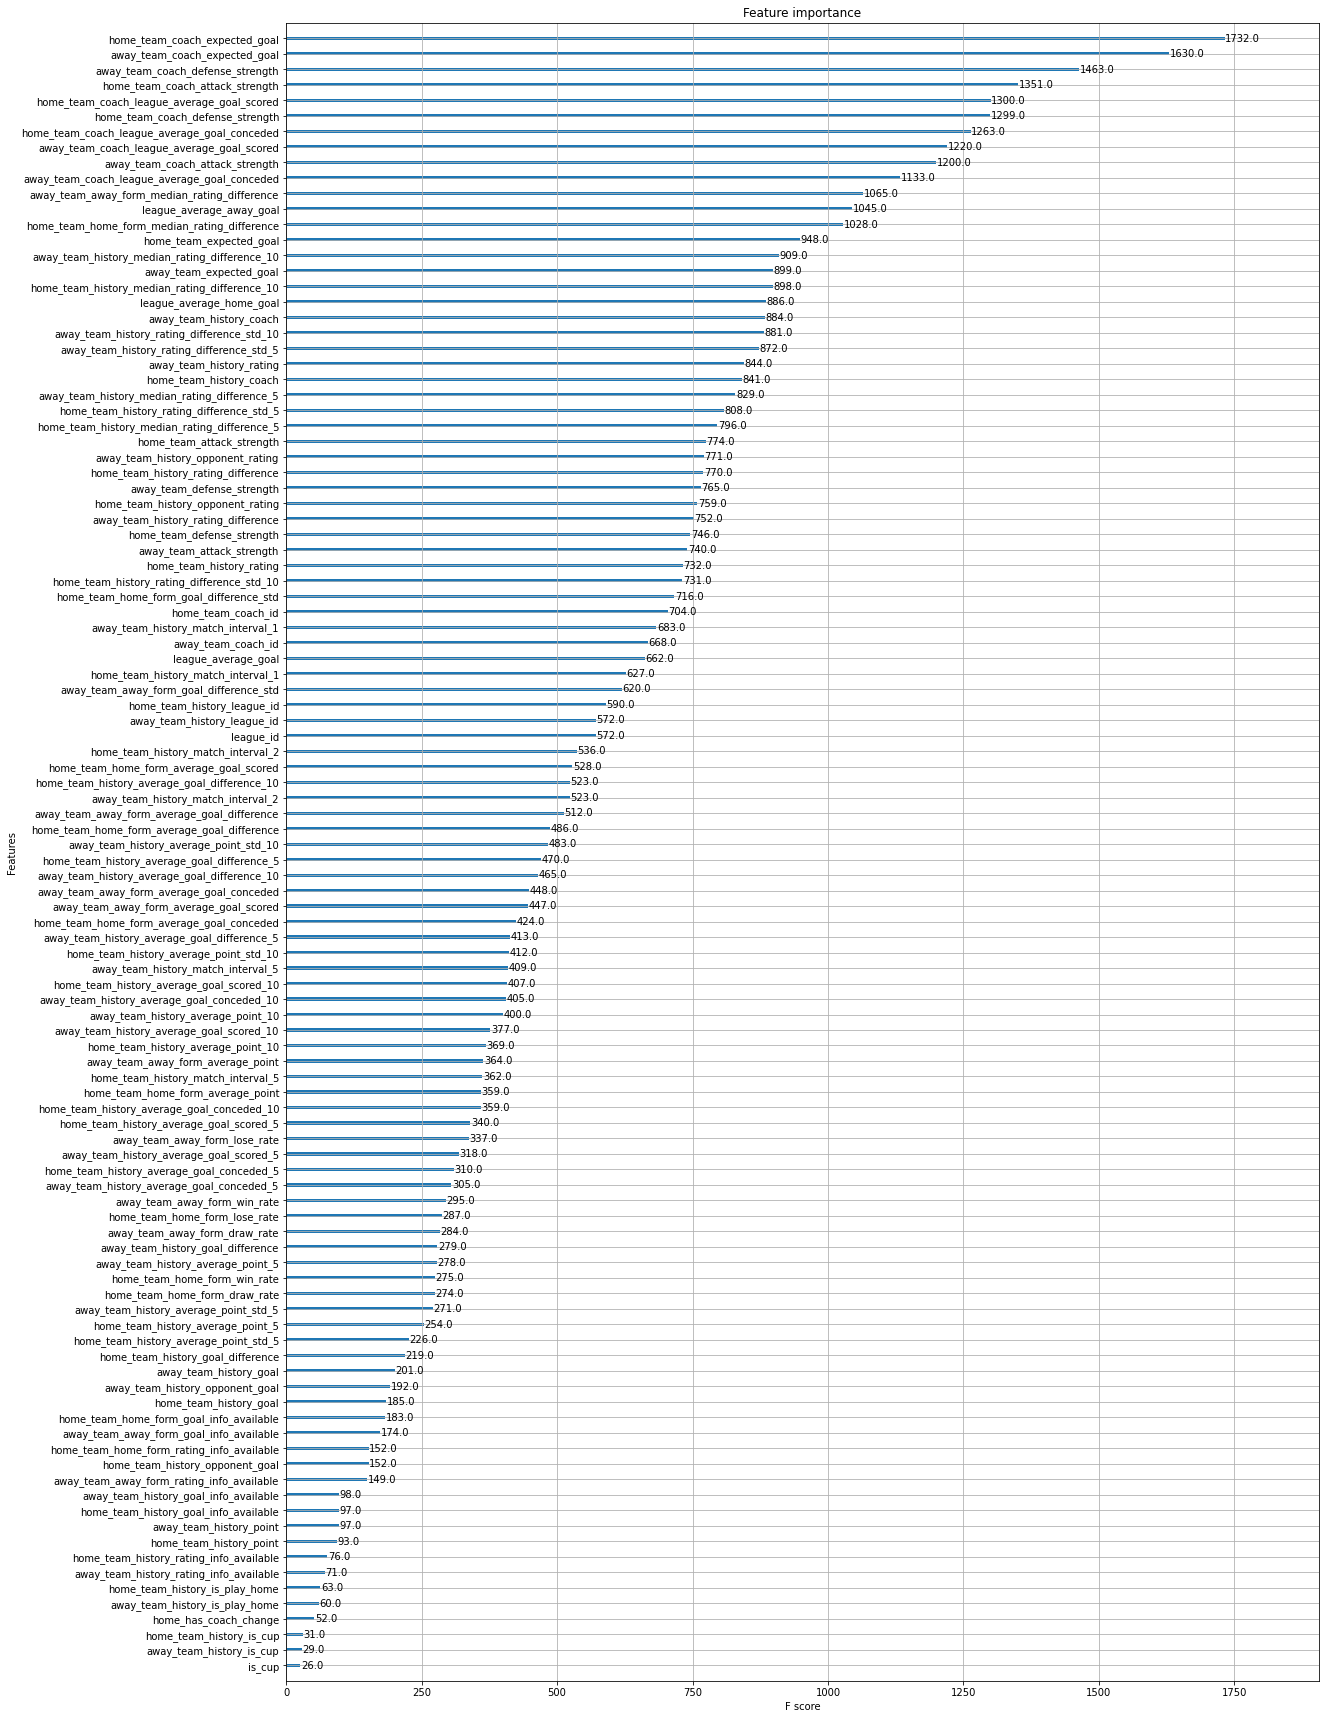

In [64]:
xgb.plot_importance(bst, max_num_features=200)
fig = plt.gcf()
fig.set_size_inches(18.5, 30.5)

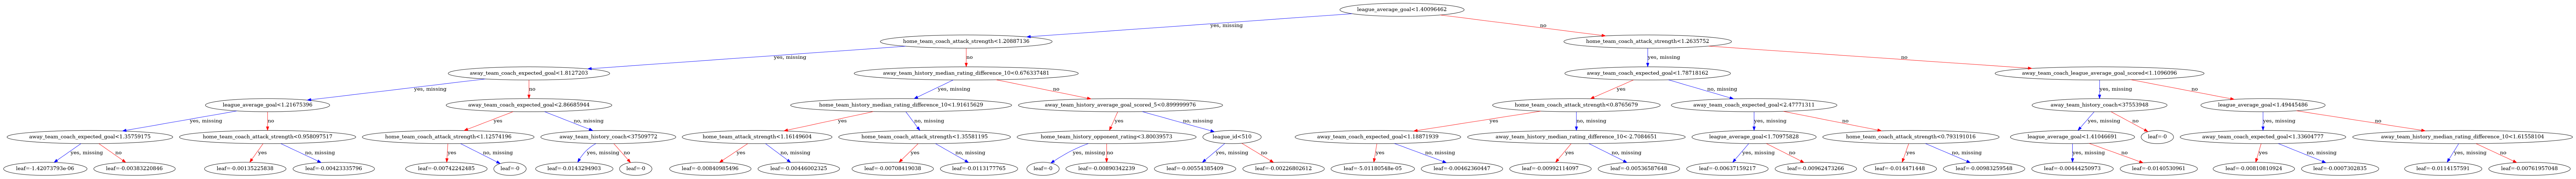

In [65]:
xgb.plot_tree(bst, num_trees=1)
fig = plt.gcf()
fig.set_size_inches(160, 100)

In [66]:
bst.best_iteration

668

In [67]:
bst.best_score

0.944059

In [68]:
test_p=preprocession(test)

In [69]:
test_p

,id,match,match_date,away_team_coach_id,league_id,is_cup,away_has_coach_change,home_has_coach_change,home_team_coach_id,home_team_history_match_date,...,home_team_coach_league_average_goal_scored,home_team_coach_league_average_goal_conceded,away_team_coach_league_average_goal_scored,away_team_coach_league_average_goal_conceded,home_team_coach_attack_strength,home_team_coach_defense_strength,away_team_coach_attack_strength,away_team_coach_defense_strength,home_team_coach_expected_goal,away_team_coach_expected_goal
0,11913628,1,2021-06-07 14:00:00,1565666.0,714,1,0,1,37570473.0,2021-05-30 11:30:00,...,0.000000,7.000000,2.00,1.0,0.000000,4.410569,1.260163,0.630081,0.000000,7.064082
1,11913628,2,2021-06-07 14:00:00,1565666.0,714,1,0,1,37570473.0,2019-11-19 11:00:00,...,0.000000,7.000000,2.00,1.0,0.000000,4.410569,1.260163,0.630081,0.000000,7.064082
2,11913628,3,2021-06-07 14:00:00,1565666.0,714,1,0,1,37570473.0,2019-10-15 14:00:00,...,0.000000,7.000000,2.00,1.0,0.000000,4.410569,1.260163,0.630081,0.000000,7.064082
3,11913628,4,2021-06-07 14:00:00,1565666.0,714,1,0,1,37570473.0,2019-10-10 12:00:00,...,0.000000,7.000000,2.00,1.0,0.000000,4.410569,1.260163,0.630081,0.000000,7.064082
4,11913628,5,2021-06-07 14:00:00,1565666.0,714,1,0,1,37570473.0,2019-09-10 05:30:00,...,0.000000,7.000000,2.00,1.0,0.000000,4.410569,1.260163,0.630081,0.000000,7.064082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727105,18450641,6,2021-11-28 22:30:00,37572009.0,779,0,0,0,261421.0,2021-10-21 00:00:00,...,1.444444,1.111111,1.75,1.0,1.027641,0.790493,1.245026,0.711444,1.215136,1.130965
727106,18450641,7,2021-11-28 22:30:00,37572009.0,779,0,0,0,261421.0,2021-10-16 17:00:00,...,1.444444,1.111111,1.75,1.0,1.027641,0.790493,1.245026,0.711444,1.215136,1.130965
727107,18450641,8,2021-11-28 22:30:00,37572009.0,779,0,0,0,261421.0,2021-10-10 00:00:00,...,1.444444,1.111111,1.75,1.0,1.027641,0.790493,1.245026,0.711444,1.215136,1.130965
727108,18450641,9,2021-11-28 22:30:00,37572009.0,779,0,0,0,261421.0,2021-10-03 20:00:00,...,1.444444,1.111111,1.75,1.0,1.027641,0.790493,1.245026,0.711444,1.215136,1.130965


In [70]:
test_p=test_p.groupby('id').first().reset_index()
X_test=test_p.drop(match_date_columns, axis=1)
X_test=X_test.drop(['id','match'], axis=1)
#X_test=X_test.drop(['id','home_team_name','away_team_name','league_name'], axis=1)
X_test_d = xgb.DMatrix(X_test)

In [71]:
test_p

,id,match,match_date,away_team_coach_id,league_id,is_cup,away_has_coach_change,home_has_coach_change,home_team_coach_id,home_team_history_match_date,...,home_team_coach_league_average_goal_scored,home_team_coach_league_average_goal_conceded,away_team_coach_league_average_goal_scored,away_team_coach_league_average_goal_conceded,home_team_coach_attack_strength,home_team_coach_defense_strength,away_team_coach_attack_strength,away_team_coach_defense_strength,home_team_coach_expected_goal,away_team_coach_expected_goal
0,11913628,1,2021-06-07 14:00:00,1565666.0,714,1,0,1,37570473.0,2021-05-30 11:30:00,...,0.000000,7.000000,2.000000,1.000000,0.000000,4.410569,1.260163,0.630081,0.000000,7.064082
1,11913633,1,2021-06-11 17:00:00,1565613.0,714,1,0,1,311388.0,2021-06-07 17:00:00,...,2.555556,1.222222,0.333333,3.333333,1.610208,0.770099,0.210027,2.100271,6.436467,0.205569
2,11913634,1,2021-06-11 14:00:00,37570473.0,714,1,0,1,8055515.0,2021-06-07 17:00:00,...,1.250000,1.000000,0.000000,4.333333,0.787602,0.630081,0.000000,2.730352,4.092754,0.000000
3,11913635,1,2021-06-04 16:00:00,1565666.0,714,1,0,1,1565613.0,2019-11-19 11:00:00,...,0.333333,3.333333,2.000000,1.000000,0.210027,2.100271,1.260163,0.630081,0.251862,3.363849
4,11913636,1,2021-05-30 11:30:00,311388.0,714,1,0,1,37570473.0,2019-11-19 11:00:00,...,0.000000,7.000000,2.857143,1.000000,0.000000,4.410569,1.800232,0.630081,0.000000,10.091546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72706,18450343,1,2021-11-30 13:00:00,458369.0,1393,1,0,0,37346872.0,2021-11-26 13:00:00,...,1.700000,0.600000,1.900000,0.200000,1.207540,0.426190,1.349603,0.142063,0.277926,0.687655
72707,18450597,1,2021-11-27 16:00:00,NaN,857,0,0,0,NaN,2021-11-23 16:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72708,18450602,1,2021-11-29 16:00:00,37369407.0,857,0,0,0,NaN,2021-11-21 16:00:00,...,NaN,NaN,1.142857,0.428571,NaN,NaN,1.152722,0.432271,NaN,NaN
72709,18450640,1,2021-11-28 20:00:00,524071.0,779,0,0,0,524398.0,2021-11-20 22:00:00,...,1.780488,1.195122,1.363636,1.727273,1.266717,0.850262,0.970150,1.228857,2.587164,0.947904


In [72]:
X_test

,away_team_coach_id,league_id,is_cup,away_has_coach_change,home_has_coach_change,home_team_coach_id,home_team_history_is_play_home,home_team_history_is_cup,home_team_history_goal,home_team_history_opponent_goal,...,home_team_coach_league_average_goal_scored,home_team_coach_league_average_goal_conceded,away_team_coach_league_average_goal_scored,away_team_coach_league_average_goal_conceded,home_team_coach_attack_strength,home_team_coach_defense_strength,away_team_coach_attack_strength,away_team_coach_defense_strength,home_team_coach_expected_goal,away_team_coach_expected_goal
0,1565666.0,714,1,0,1,37570473.0,1.0,1.0,0.0,7.0,...,0.000000,7.000000,2.000000,1.000000,0.000000,4.410569,1.260163,0.630081,0.000000,7.064082
1,1565613.0,714,1,0,1,311388.0,1.0,1.0,2.0,0.0,...,2.555556,1.222222,0.333333,3.333333,1.610208,0.770099,0.210027,2.100271,6.436467,0.205569
2,37570473.0,714,1,0,1,8055515.0,0.0,1.0,0.0,2.0,...,1.250000,1.000000,0.000000,4.333333,0.787602,0.630081,0.000000,2.730352,4.092754,0.000000
3,1565666.0,714,1,0,1,1565613.0,1.0,1.0,3.0,1.0,...,0.333333,3.333333,2.000000,1.000000,0.210027,2.100271,1.260163,0.630081,0.251862,3.363849
4,311388.0,714,1,0,1,37570473.0,0.0,1.0,1.0,3.0,...,0.000000,7.000000,2.857143,1.000000,0.000000,4.410569,1.800232,0.630081,0.000000,10.091546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72706,458369.0,1393,1,0,0,37346872.0,0.0,1.0,1.0,1.0,...,1.700000,0.600000,1.900000,0.200000,1.207540,0.426190,1.349603,0.142063,0.277926,0.687655
72707,NaN,857,0,0,0,NaN,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72708,37369407.0,857,0,0,0,NaN,1.0,0.0,0.0,0.0,...,NaN,NaN,1.142857,0.428571,NaN,NaN,1.152722,0.432271,NaN,NaN
72709,524071.0,779,0,0,0,524398.0,1.0,0.0,3.0,1.0,...,1.780488,1.195122,1.363636,1.727273,1.266717,0.850262,0.970150,1.228857,2.587164,0.947904


In [73]:
predictions = bst.predict(X_test_d, iteration_range=(0, bst.best_iteration))

In [74]:
predictions

array([[0.9484369 , 0.035235  , 0.01632807],
       [0.01026813, 0.02700205, 0.9627299 ],
       [0.01595922, 0.06035817, 0.9236826 ],
       ...,
       [0.52694637, 0.3220085 , 0.15104517],
       [0.12650457, 0.18642817, 0.6870673 ],
       [0.31825396, 0.26796287, 0.41378313]], dtype=float32)

In [75]:
test.sort_values(by='id')['id']

11774    11913628
12377    11913633
12315    11913634
10826    11913635
9906     11913636
           ...   
72571    18450343
71384    18450597
72447    18450602
72333    18450640
72371    18450641
Name: id, Length: 72711, dtype: int64

In [76]:
submission = pd.DataFrame(predictions ,columns=label_encoder.inverse_transform([0,1,2]))
submission['id'] = test.sort_values(by='id').reset_index()['id']
cols=['id','home','away','draw']
submission=submission[cols]
display(submission)

,id,home,away,draw
0,11913628,0.016328,0.948437,0.035235
1,11913633,0.962730,0.010268,0.027002
2,11913634,0.923683,0.015959,0.060358
3,11913635,0.016758,0.933998,0.049244
4,11913636,0.009014,0.961665,0.029322
...,...,...,...,...
72706,18450343,0.183928,0.470788,0.345284
72707,18450597,0.382689,0.229449,0.387861
72708,18450602,0.151045,0.526946,0.322008
72709,18450640,0.687067,0.126505,0.186428


In [77]:
submission.to_csv('submission.csv', index=False)